# Scenario E - Peakshape Variation (pVoigt model - results evaluation)

This file is used to evaluate the inference results.

In this scenario the peakshape in a spectrum with a fixed number of peaks is varied from Gaussian (n = 0.0) to Lorentzian (n = 1.0). All datasets contain 3 peaks and the noise level is kept constant at 1%.

The model used in the inference of the parameters is formulated as follows:

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot f_{pseudo-Voigt}(x)\big] + \epsilon
\end{equation}

where:

\begin{equation}
\large f_{pseudo-Voigt}(x) = \eta \cdot \frac{\sigma_m^2}{(x-\mu_m)^2 + \sigma_m^2} + (1 - \eta) \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8


## Load results summary

In [42]:
# load results from disk
df = pd.read_csv('./scenario_peakshape_pvoigt.csv')
df.index += 1
df.head(50)

,r_hat,mcse,ess,bfmi,r2,waic,epsilon,epsilon_real,eta,eta_real
1,1.641818,1.571909,8.363636,1.151328,0.999901,-4675.198344,0.051014,0.05,0.001519,0.00
2,1.000000,0.000000,3539.181818,0.998667,0.999820,-4697.720473,0.050380,0.05,0.000919,0.00
3,1.000000,0.000000,4848.363636,1.052842,0.999777,-3636.169835,0.071772,0.05,0.000190,0.00
4,1.000000,0.000000,4182.363636,1.073602,0.999844,-4842.591355,0.047989,0.05,0.004857,0.00
5,1.000000,0.000000,3780.727273,0.997179,0.999884,-4781.770459,0.049033,0.05,0.000588,0.00
6,1.000000,0.000000,3879.090909,1.058400,0.999894,-4541.011174,0.053097,0.05,0.000455,0.00
7,1.000000,0.000000,3644.090909,1.031547,0.999594,-4419.386565,0.055317,0.05,0.000431,0.00
8,1.000000,0.000455,1857.454545,1.046772,0.999919,-4708.369829,0.050194,0.05,0.002705,0.00
9,1.004545,0.009727,1045.727273,0.977334,0.999926,-4610.191631,0.051919,0.05,0.002480,0.00
10,1.000000,0.000000,3454.181818,1.016618,0.999874,-4643.682553,0.051312,0.05,0.001490,0.00


In [3]:
#suc = df.loc[(df['r_hat'] <= 1.1) & (df['r2'] >= 0.99)]
#suc
suc = df.loc[(df['r2'] >= 0.99)]
len(suc)

50

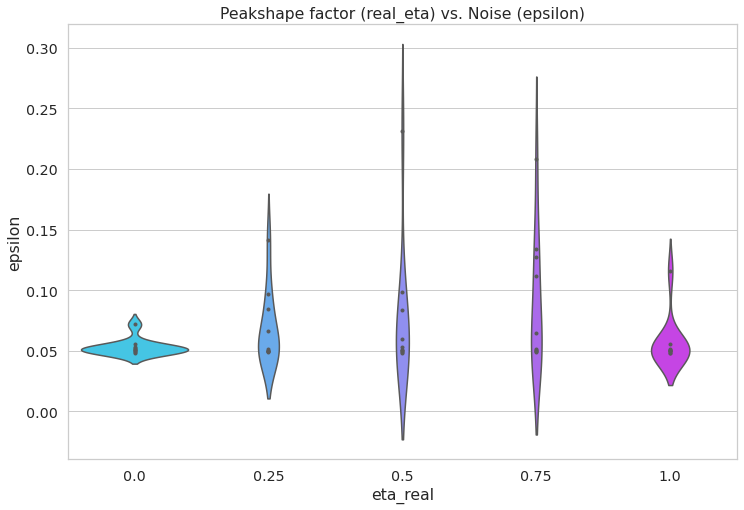

In [41]:
import seaborn as sns
sns.set(style="whitegrid", rc={'figure.figsize':(12,8)}, font_scale=1.3)

ax = sns.violinplot(x='eta_real', y='epsilon', data=suc, inner="points", palette="cool", linewidth=1.5) \
                    .set_title("Peakshape factor (real_eta) vs. Noise (epsilon)");